<h1>Song Popularity Prediction in Spotify Dataset using Ensemble Learning and Cross-validation Technique</h1>

<h3>Importing Libraries and Dataset (Data Extraction)</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score


df = pd.read_csv('dataset.csv').sample(frac=0.333, random_state=42)

df.head()

Unnamed: 0                track_id                     artists  \
113186      113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
42819        42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
59311        59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
91368        91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
61000        61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                             album_name             track_name  popularity  \
113186                    No Other Name          No Other Name          50   
42819                    Grieving Birth         Failed Organum          11   
59311              Noise A Noise 20.4-1  Save the Trees, Pt. 1           0   
91368   All I Want For Christmas Is You        Merry Christmas           0   
61000                        バレッタ TypeD                  月の大きさ          57   

        duration_ms  explicit  danceability  energy  ...  loudness  mode  \
113186       440247     False         0.369   0.598  ...    -6.984     1   
42819         93933     False         0.171   0.997  ...    -3.586     1   
59311        213578     False         0.173   0.803  ...   -10.071     0   
91368        151387     False         0.683   0.511  ...    -5.598     1   
61000        236293     False         0.555   0.941  ...    -3.294     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
113186       0.0304       0.00511          0.000000     0.176   0.0466   
42819        0.1180       0.00521          0.801000     0.420   0.0294   
59311        0.1440       0.61300          0.001910     0.195   0.0887   
91368        0.0279       0.40600          0.000197     0.111   0.5980   
61000        0.0481       0.48400          0.000000     0.266   0.8130   

          tempo  time_signature  track_genre  
113186  148.014               4  world-music  
42819   122.223               4    grindcore  
59311    75.564               3      iranian  
91368   109.991               3         rock  
61000    92.487               4       j-idol  

[5 rows x 21 columns]

<p>
    Taking 0.33 fraction of whole dataset as the dataset is too big and processing one cell might take hours during model
    fitting, evaluation and cross-validation. Due to this, some metrics like accuracy will be affected but we are just
    exploring the dataset through ensemble learning and cross-validation technique.
</p>

<h3>Exploratory Data Analysis</h3>

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37962 entries, 113186 to 38711
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        37962 non-null  int64  
 1   track_id          37962 non-null  object 
 2   artists           37961 non-null  object 
 3   album_name        37961 non-null  object 
 4   track_name        37961 non-null  object 
 5   popularity        37962 non-null  int64  
 6   duration_ms       37962 non-null  int64  
 7   explicit          37962 non-null  bool   
 8   danceability      37962 non-null  float64
 9   energy            37962 non-null  float64
 10  key               37962 non-null  int64  
 11  loudness          37962 non-null  float64
 12  mode              37962 non-null  int64  
 13  speechiness       37962 non-null  float64
 14  acousticness      37962 non-null  float64
 15  instrumentalness  37962 non-null  float64
 16  liveness          37962 non-null  f

In [3]:
df.describe()

Unnamed: 0    popularity   duration_ms  danceability        energy  \
count   37962.000000  37962.000000  3.796200e+04  37962.000000  37962.000000   
mean    56769.903324     33.253438  2.285051e+05      0.565951      0.641043   
std     32722.499999     22.274439  1.116780e+05      0.174323      0.251476   
min         3.000000      0.000000  0.000000e+00      0.000000      0.000000   
25%     28741.000000     17.000000  1.736485e+05      0.455000      0.472000   
50%     56616.000000     35.000000  2.131600e+05      0.579000      0.683000   
75%     84931.000000     50.000000  2.618468e+05      0.694000      0.853000   
max    113999.000000     98.000000  4.730302e+06      0.980000      1.000000   

                key      loudness          mode   speechiness  acousticness  \
count  37962.000000  37962.000000  37962.000000  37962.000000  37962.000000   
mean       5.311469     -8.247006      0.636795      0.084223      0.314002   
std        3.552973      5.016145      0.480930      0.105637      0.332275   
min        0.000000    -49.531000      0.000000      0.000000      0.000000   
25%        2.000000    -10.035000      0.000000      0.035700      0.016500   
50%        5.000000     -6.980500      1.000000      0.048600      0.168000   
75%        8.000000     -5.001250      1.000000      0.084300      0.594000   
max       11.000000      1.795000      1.000000      0.965000      0.996000   

       instrumentalness      liveness       valence         tempo  \
count      37962.000000  37962.000000  37962.000000  37962.000000   
mean           0.153940      0.213458      0.473586    122.231703   
std            0.307324      0.190047      0.259948     30.034249   
min            0.000000      0.000000      0.000000      0.000000   
25%            0.000000      0.098200      0.256000     99.313500   
50%            0.000043      0.132000      0.463000    122.030000   
75%            0.047300      0.273000      0.683000    140.123750   
max            1.000000      1.000000      0.992000    243.372000   

       time_signature  
count    37962.000000  
mean         3.907513  
std          0.427397  
min          0.000000  
25%          4.000000  
50%          4.000000  
75%          4.000000  
max          5.000000

In [4]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

<p><b><big>Features: </big></b></p> <br />
<div><b></b></div>
<div>
    <b>Explicit: </b>
    <p>The "explicit" attribute in a music dataset indicates whether a song contains explicit content or explicit lyrics. It refer to material that contains explicit language, themes, or content that may be considered offensive, sensitive, or inappropriate for certain audiences. It often includes explicit references to profanity, violence, sexual content, drug use, or other explicit topics.</p>
</div>
<div>
    <b>Key: </b>
    <p>The "key" attribute represents the musical key in which a particular song is composed.Common key values include C major, D minor, G major, etc. The key can be represented using musical notation or a numerical encoding system.</p>
</div>
<div>
    <b>Mode: </b>
    <p>The "mode" attribute describes the musical mode or tonality of a song. It indicates whether the song is in a major mode or a minor mode. Major mode is associated with a more uplifting, happy, or bright sound, while minor mode often evokes a darker, sadder, or more melancholic atmosphere. The mode can be represented using terms like major, minor, or using numerical values like 1 for major and 0 for minor.</p>
</div>
<div>
    <b>Time Signature: </b>
    <p>Time signature is a musical notation that represents the organization of beats within a measure or bar of music. The time signature of 4/4 (also known as common time) means there are four beats per measure (musical segment), 
and a quarter note receives one beat.</p>
</div>
<div>
    <b>Valence: </b></div>
    <p>"Valence" refers to a measure of the musical track's perceived positivity or negativity, often associated with the emotional character or mood of the music. It represents the degree of pleasantness or unpleasantness conveyed by the sound and musical elements of a track.</p>
<div><b></b></div>

In [5]:
df.shape, df.size

((37962, 21), 797202)

The total observations in this dataset is 114000 and total features are 21.

In [6]:
df.nunique()

Unnamed: 0          37962
track_id            34459
artists             16369
album_name          22217
track_name          30125
popularity             98
duration_ms         24589
explicit                2
danceability         1009
energy               1629
key                    12
loudness            13658
mode                    2
speechiness          1366
acousticness         4346
instrumentalness     4849
liveness             1648
valence              1635
tempo               23043
time_signature          5
track_genre           114
dtype: int64

In [7]:
df1 = df.copy()
df2 = df.copy()

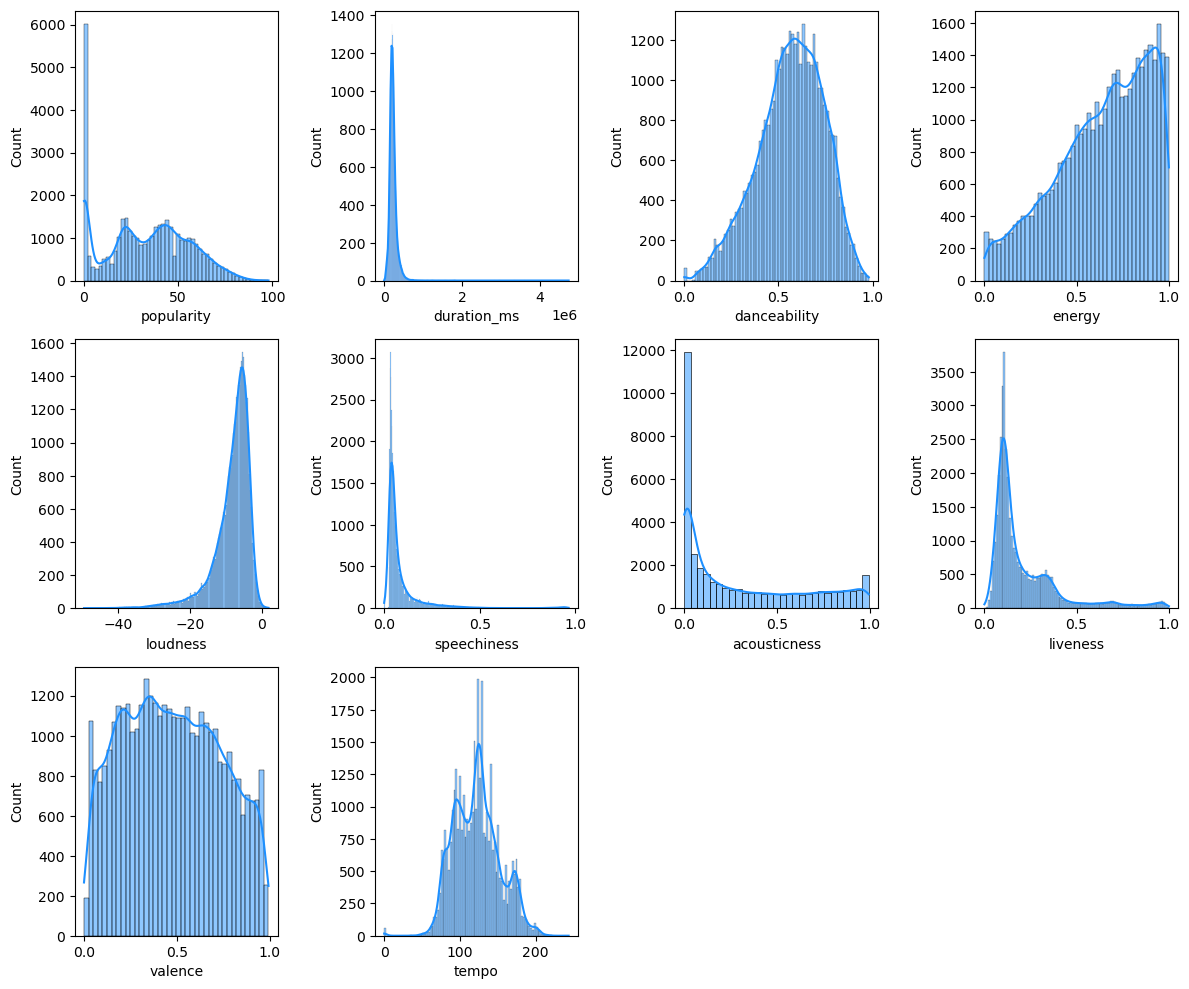

In [8]:
df1 = df1.select_dtypes(exclude=['object', 'bool'])
df1 = df1.drop(['Unnamed: 0', 'key', 'mode', 'instrumentalness', 'time_signature'], axis=1)

ncols = 4
nrows = int(len(df1.columns) / ncols) + (len(df1.columns) % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))

for idx, column in enumerate(df1.columns):
    ax = axes[idx // ncols, idx % ncols]  # Get the current axis
    sns.histplot(data=df1[column], kde=True, color="dodgerblue", ax=ax)

# Remove any extra subplots if the number of columns is not divisible by ncols
if len(df1.columns) % ncols != 0:
    for j in range(len(df1.columns) % ncols, ncols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

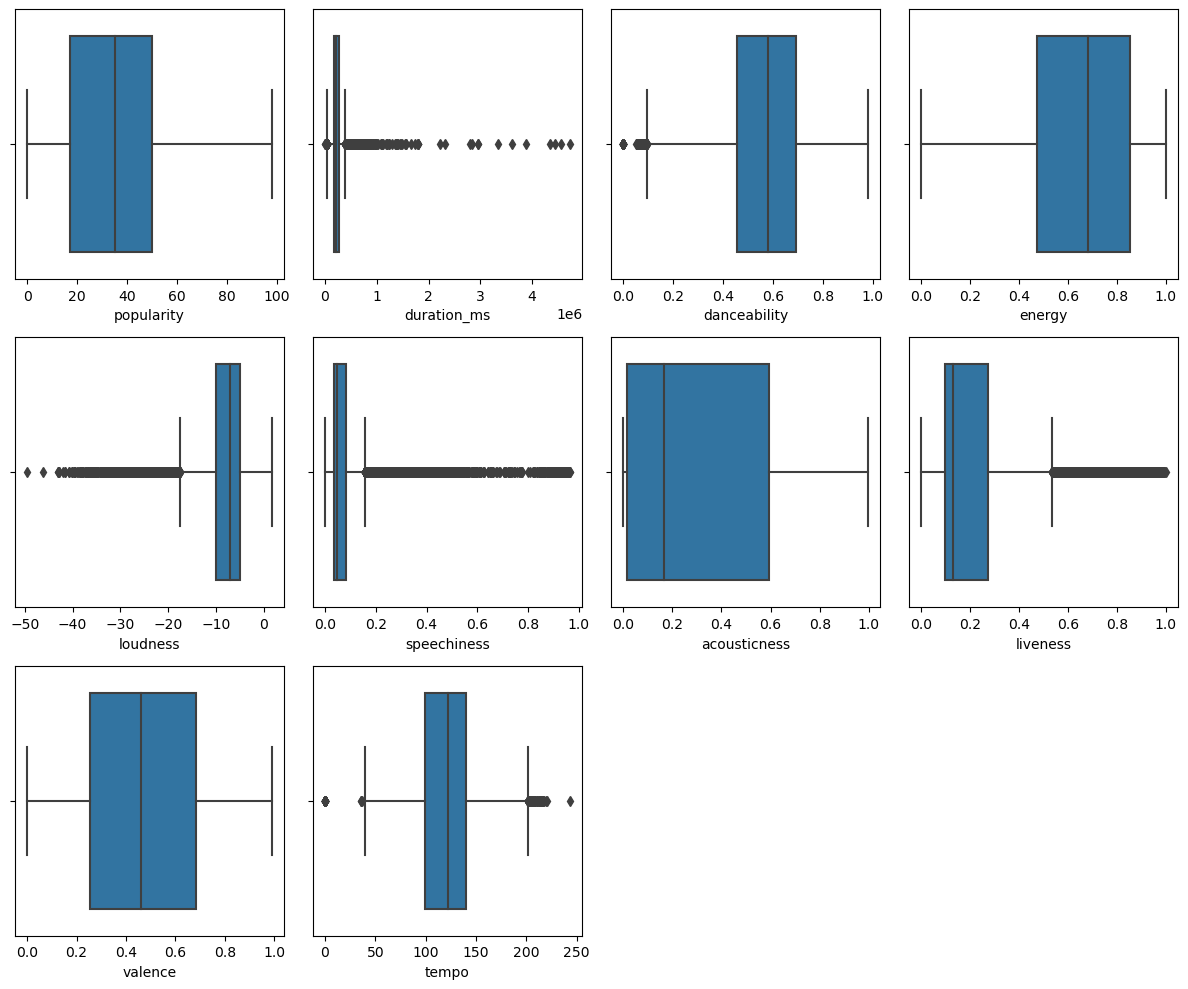

In [9]:
ncols = 4
nrows = int(len(df1.columns) / ncols) + (len(df1.columns) % ncols > 0)

fig, axes = plt.subplots(nrows, ncols, figsize=(12, 10))

for idx, column in enumerate(df1.columns):
    ax = axes[idx // ncols, idx % ncols]  # Get the current axis
    sns.boxplot(data=df1, x=column, ax=ax)

# Remove any extra subplots if the number of columns is not divisible by ncols
if len(df1.columns) % ncols != 0:
    for j in range(len(df1.columns) % ncols, ncols):
        fig.delaxes(axes[-1, j])

plt.tight_layout()
plt.show()

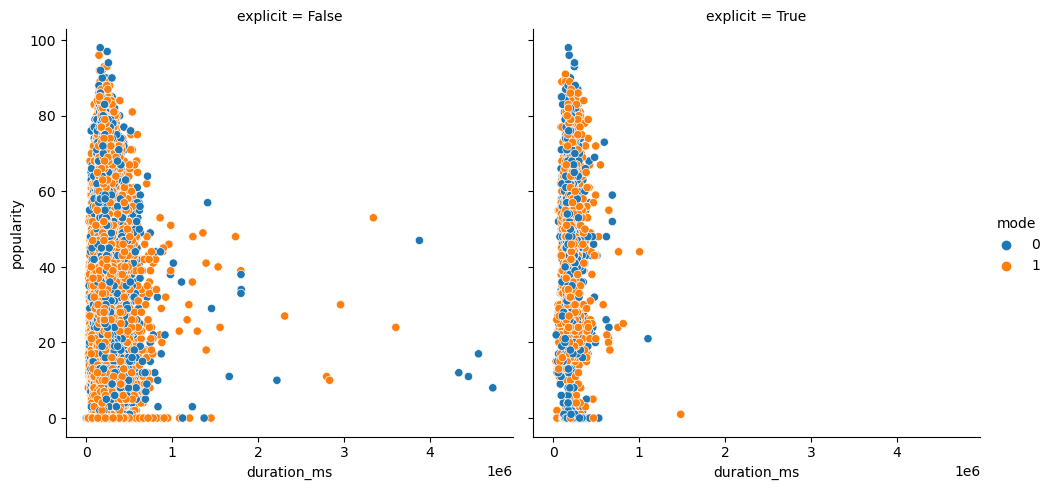

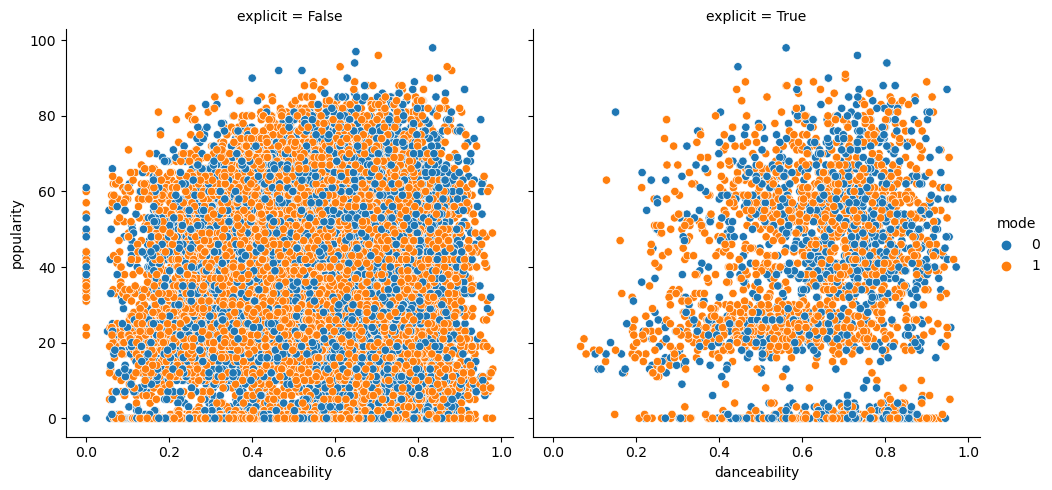

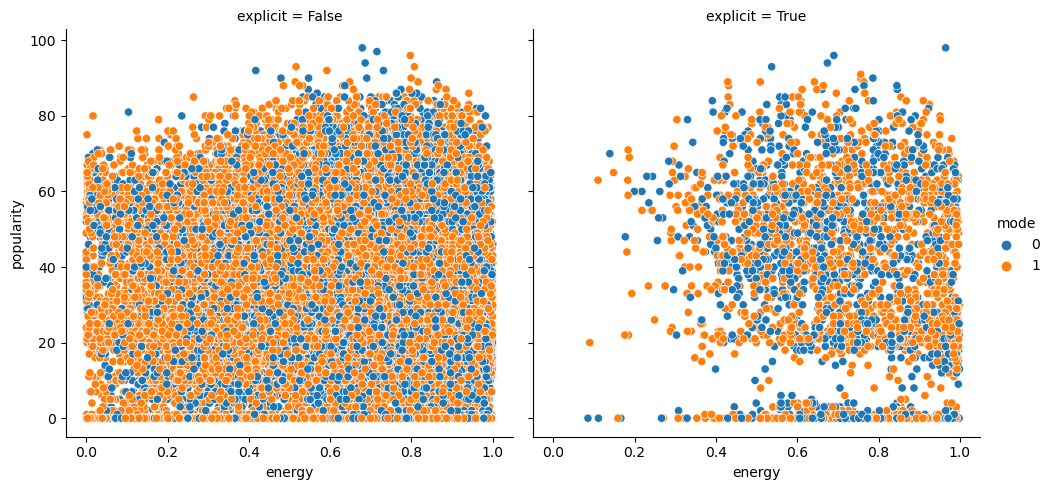

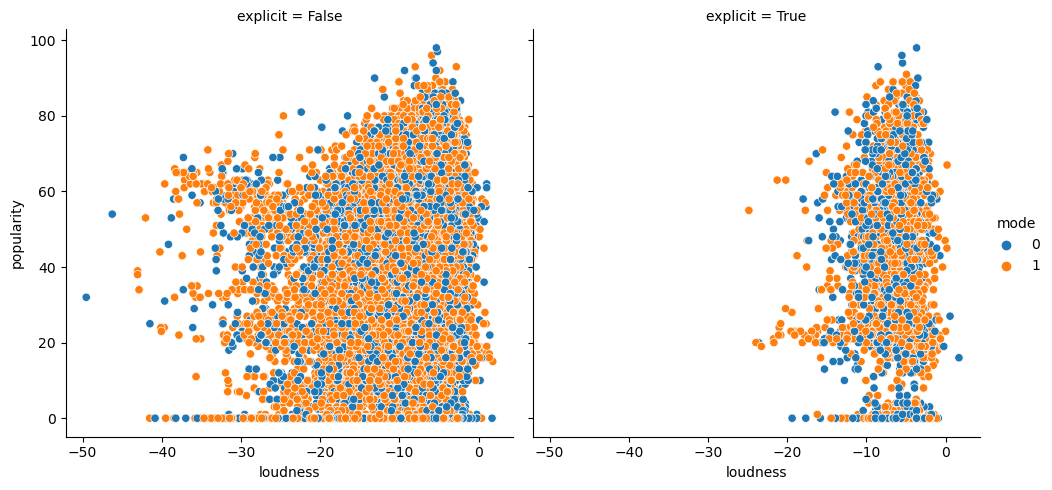

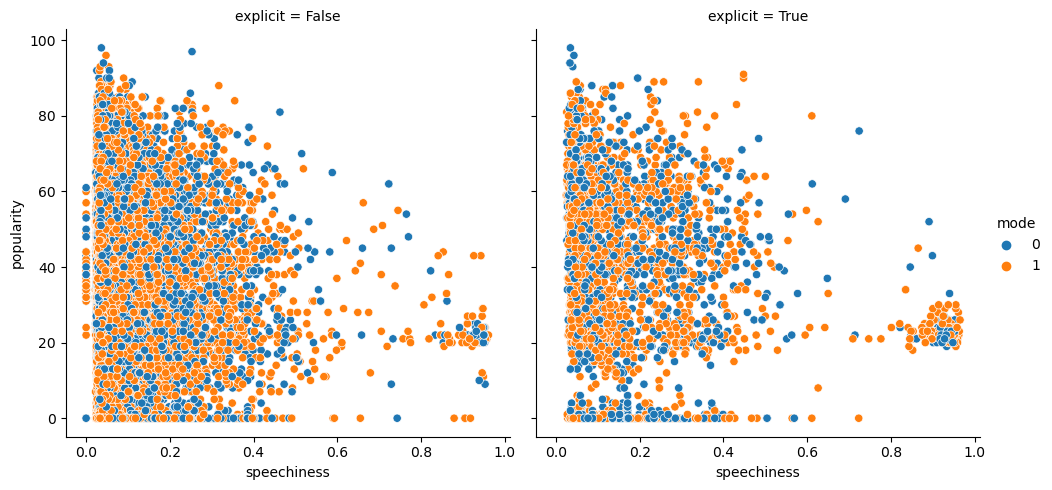

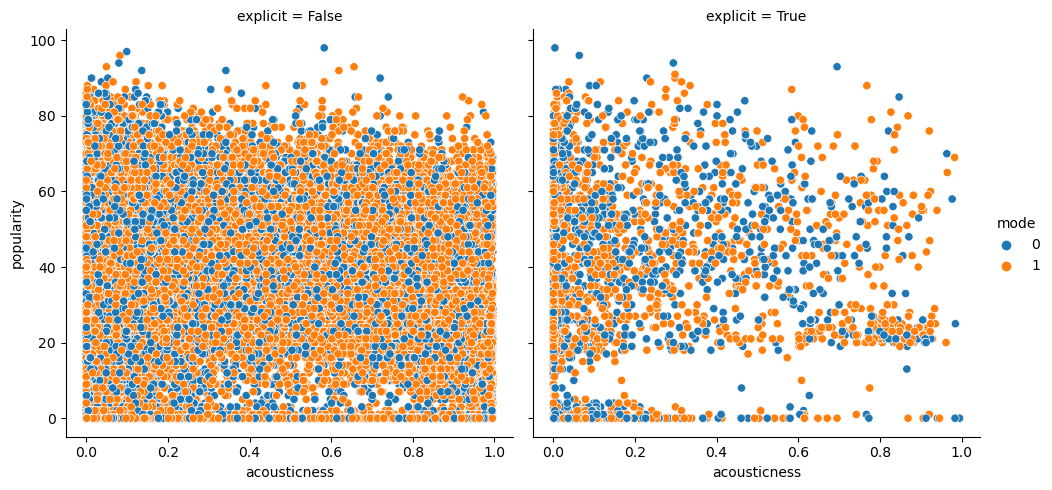

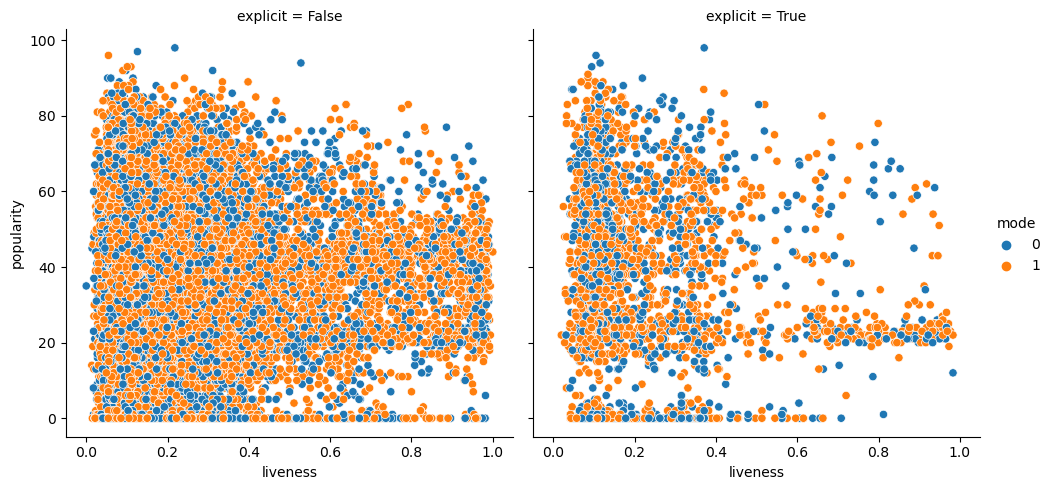

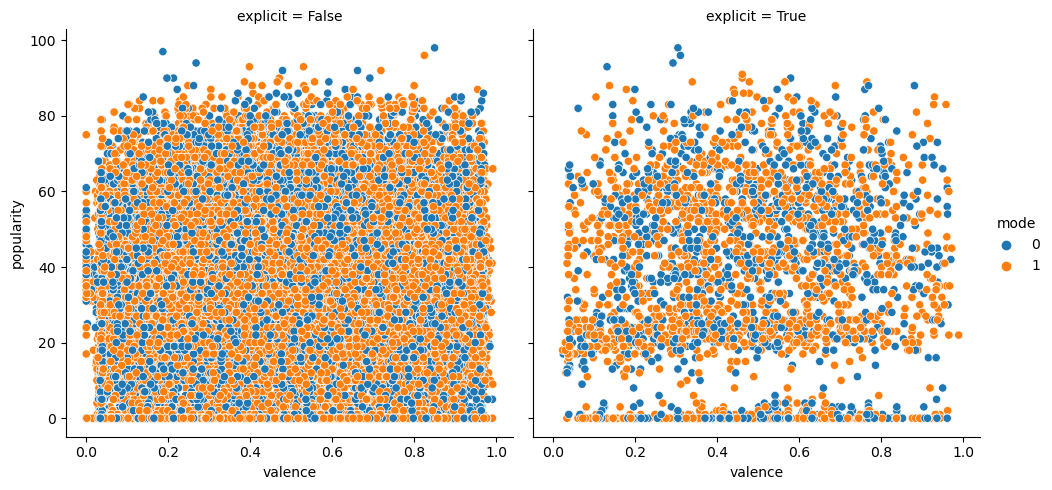

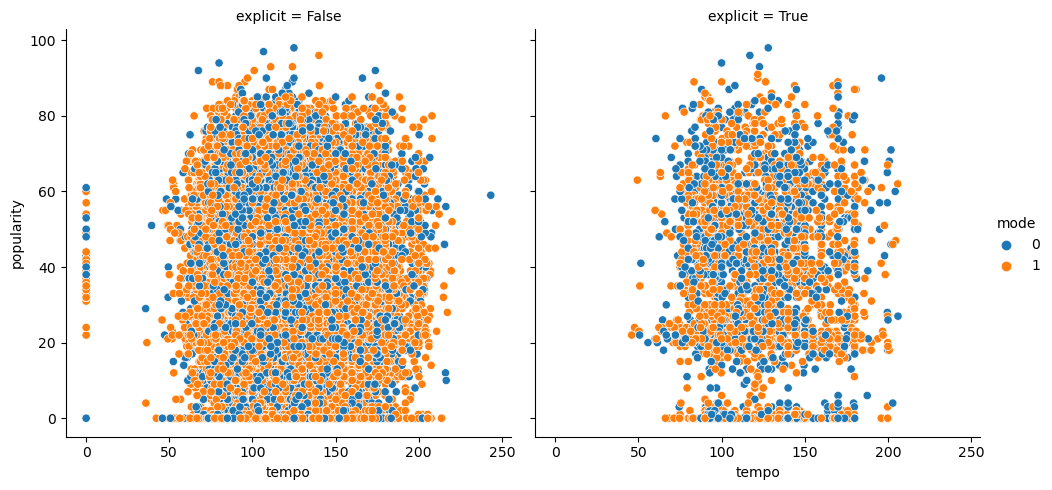

In [10]:
for column in df1.columns:
    if column != 'popularity':
        sns.relplot(data=df1, x=column, y="popularity", col=df['explicit'], hue=df['mode'])
        plt.close(fig)

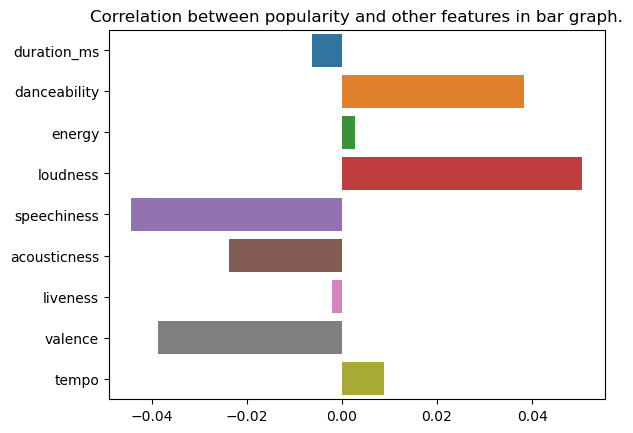

In [11]:
# plt.figure(figsize=(15,12))
# df2 = df.select_dtypes(exclude=['object', 'bool']).sample(frac=1.0)
# cols = df2.columns
# sns.heatmap(data=df2.corr(), annot=True)
# plt.show()

sns.barplot(
    y=[column for column in df1.columns if column != 'popularity'], 
    x=[df1[column].corr(df1['popularity']) for column in df1.columns if column != 'popularity'], 
    orient="h"
)
plt.title("Correlation between popularity and other features in bar graph.")
plt.show()

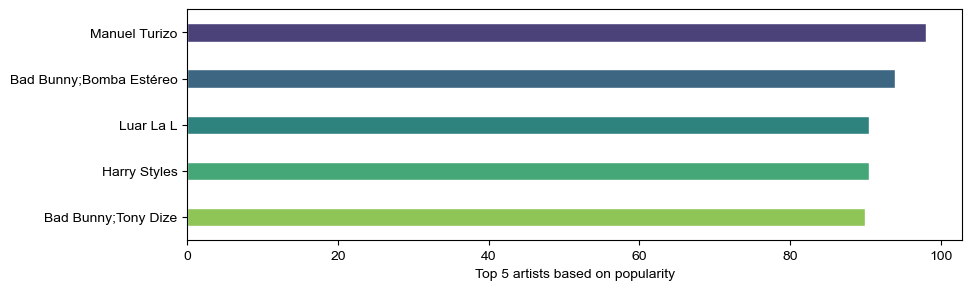

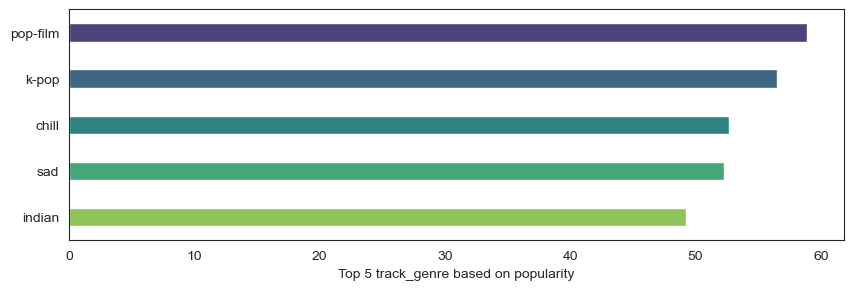

In [12]:
selected_cols = ['artists', 'track_genre']

for idx, column in enumerate(selected_cols):
    df_p = df2.groupby(column).mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 3))
    sns.axes_style('white')
    sns.set_style('white')
    sns.barplot(data=df_p.head(5), x = 'popularity', y=column, orient="h", ax=ax, width=0.4, palette="viridis")
    plt.xlabel(f'Top 5 {column} based on popularity')
    plt.ylabel('')
    
    plt.show()

<h2>Data Preprocessing</h2>

<h3>1. Data Validation and Cleansing</h3>

In [13]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

 The track_id, album_name and track_name features have one null value. Just dropping the null valued observations.

In [14]:
df = df.dropna()  # dropping the rows containing null value.
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [15]:
print(df.duplicated().sum()) # counting the duplicate rows
df.duplicated()

0


113186    False
42819     False
59311     False
91368     False
61000     False
          ...  
111573    False
10409     False
96242     False
59974     False
38711     False
Length: 37961, dtype: bool

In [16]:
df.drop(['Unnamed: 0'], inplace=True, axis=1) # dropping "Unnamed: 0" columns as it is unique valued column
df.duplicated().sum() # counting the number of duplicate rows

50

In [17]:
df.loc[df.duplicated(), :] # extracting the duplicated observations.

track_id  \
93342   2sWCKLm6qrQ4Hu6Lkrh2Xb   
93402   4v16scAVhylOWvkkcmd4DX   
93306   31V8fcY1mQGjqDIrFSNy2w   
59733   0Xyy5ASa9iuqIgzH2mY9T6   
52511   7o68KX6XyCS9lydBTH6TCP   
27743   5fGYsQIipt0ZYwEtcedXDm   
93463   6FwmTj0KzcljTlBd0VqBcA   
20277   0GDAt9fPbs9tPqg2n4ne5u   
82815   7tyxIzfJI6uoc7t9kwwGmf   
60877   6iNOsIMBxXGOZnFqCMkC6N   
68110   2ldVpRwLjfUWCDqrjNQYWt   
20513   7lvUf1BLEZuuwhbc9xeR12   
67193   7lTWdUAtKRdaRS0UbQD9y7   
111362  2zg3iJW4fK7KZgHOvJU67z   
16223   5Ib5W64RwrPCN3bnRO4C2W   
16710   1lOhnZV1VVicEMHDEsUXVQ   
52729   2CzSTQKg7RNomVePzk2NN9   
93357   6oUDN88DZ8XKIVDfJEyzkN   
68169   0w6KXQRbURk23AtKn3q5Wr   
93313   2jQbiFdf25wYRHcq0JiWRR   
79911   3VBPPIu4MGBnMj4SF8sJBJ   
93290   7zkgAyL3DS6PE5FWzk3QKM   
16935   2YF4qV9DzrcrSyddCkpTxV   
93486   399J96pvyrrDAHDXBY1qnf   
71866   4Y2bR875LdPq9JILrY2FSw   
35520   4DAR1lX8D0pFUWmjrlnMro   
16930   7wvPoDq2sE2qvRE1Trramr   
50769   204523f9MSgEfc0oDJycNS   
66759   5n1KwNkJXixrG3HK0tq5Cy   
51221   1dVZeuQFWzSI22d3hPEncI   
16747   03B8ZXUmuDpf59j5PIMFHq   
66593   4OJXEwWF5CKqWmCRx8vuks   
39294   2W0U2k7mG3pjeavi6FK27N   
81436   6arE1lr4B2jsrWP1GBIkYH   
20263   3IPpVTudk50Hj4VThfdzBP   
59728   6392PdXvZN8BOjcRxvkKO6   
16936   2lTWvfqX8itVpHvQ8EMhS6   
17853   5rOzcHIZaF038jMeHkUZR0   
93387   1OZtXGoPN2deUyjKLbl6CW   
7844    5Aq43Qi1j27J5KQkKYYKq0   
52965   2HyijvbsWtIgLt3nSxPYML   
16269   4k1gofu5MHXtsbqfikEzVq   
93484   3ZNOzd4hnbbjTfMvebFt9D   
20941   5ECXNOI8OA9Or0JRogCqTK   
39329   0jI5ex80hYYbLQsX3G5Ze7   
20516   2qSnqsLv7b9GbWFhyZJwMM   
93437   1JjlEP76VzsKKBRa2JdvIy   
81492   4F9mATfUA9J8t7oQ9COCcQ   
52912   3ot7yfRXpFYYmBBZ8XrM2f   
16274   26Dme5GkC1yX4P2QU9V6Sk   

                                                  artists  \
93342                                     Nikolai Erdenko   
93402                                    Izabella Yurieva   
93306                    Александр Цфасман;Павел Михайлов   
59733                                          Garhelenth   
52511                                        George Jones   
27743                                       High Contrast   
93463                                         Vadim Kozin   
20277                              Charlie Puth;Jung Kook   
82815                                               F.Y.P   
60877                                         Vybz Kartel   
68110                              Daddy Yankee;Bad Bunny   
20513                                           Burna Boy   
67193                                            J Balvin   
111362                                          Faithless   
16223                             Edvard Grieg;Una Bourne   
16710                  Wolfgang Amadeus Mozart;Erik Smith   
52729                                        George Jones   
93357                                       Галина Карева   
68169                                        Daddy Yankee   
93313                                    Группа "Загадка"   
79911                                        Ever So Blue   
93290                                    Vladimir Nechaev   
16935   Wolfgang Amadeus Mozart;Wiener Mozart Ensemble...   
93486                                        Oleg Pogudin   
71866                                          Bad Wolves   
35520                                 Bonde do gato preto   
16930   Wolfgang Amadeus Mozart;New Philharmonia Orche...   
50769                                              Accept   
66759                                         Ray Remesch   
51221                        Daddy Yankee;El Alfa;Lil Jon   
16747   Wolfgang Amadeus Mozart;Heinz Holliger;Academy...   
66593                                      The Party Cats   
39294   Hans Zimmer;Lisa Gerrard;Gavin Greenaway;The L...   
81436                   David Guetta;MistaJam;John Newman   
20263                                                 Sia   
59728                                             Spuntic   
16936   Wolfgang Amadeus Mozar

In [18]:
# df = df[~df.duplicated() == 1] # extracting non-duplicate rows
df.drop_duplicates(inplace=True)
df.shape

(37911, 20)

<h3>2. Feature Scaling</h3>

In [19]:
df['duration_ms'] = df['duration_ms'] / (1000)
df.rename(columns={'duration_ms': "duration_s"}, inplace=True)
df.head()

track_id                     artists  \
113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
42819   2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
59311   5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
91368   75hT0hvlESnDJstem0JgyR                 Bryan Adams   
61000   4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                             album_name             track_name  popularity  \
113186                    No Other Name          No Other Name          50   
42819                    Grieving Birth         Failed Organum          11   
59311              Noise A Noise 20.4-1  Save the Trees, Pt. 1           0   
91368   All I Want For Christmas Is You        Merry Christmas           0   
61000                        バレッタ TypeD                  月の大きさ          57   

        duration_s  explicit  danceability  energy  key  loudness  mode  \
113186     440.247     False         0.369   0.598    7    -6.984     1   
42819       93.933     False         0.171   0.997    7    -3.586     1   
59311      213.578     False         0.173   0.803    9   -10.071     0   
91368      151.387     False         0.683   0.511    6    -5.598     1   
61000      236.293     False         0.555   0.941    9    -3.294     0   

        speechiness  acousticness  instrumentalness  liveness  valence  \
113186       0.0304       0.00511          0.000000     0.176   0.0466   
42819        0.1180       0.00521          0.801000     0.420   0.0294   
59311        0.1440       0.61300          0.001910     0.195   0.0887   
91368        0.0279       0.40600          0.000197     0.111   0.5980   
61000        0.0481       0.48400          0.000000     0.266   0.8130   

          tempo  time_signature  track_genre  
113186  148.014               4  world-music  
42819   122.223               4    grindcore  
59311    75.564               3      iranian  
91368   109.991               3         rock  
61000    92.487               4       j-idol

<h3>3. Data Agreggation and Representation</h3>

In [20]:
df_p = df2.groupby('artists').mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
df_p.head(5) # top five artists based on popularity

artists  Unnamed: 0  popularity  duration_ms  explicit  \
9141            Manuel Turizo     68303.0        98.0     162637.0       0.0   
1492  Bad Bunny;Bomba Estéreo     88404.0        94.0     258298.0       0.0   
8685                Luar La L     78557.0        90.5     141340.0       1.0   
6000             Harry Styles     81181.5        90.5     170651.5       0.0   
1502      Bad Bunny;Tony Dize     89269.0        90.0     198367.0       1.0   

      danceability  energy   key  loudness  mode  speechiness  acousticness  \
9141         0.835  0.6790   7.0   -5.3290   0.0       0.0364         0.583   
1492         0.647  0.6860   3.0   -5.7450   0.0       0.0413         0.080   
8685         0.704  0.7560   0.0   -4.9480   1.0       0.4480         0.298   
6000         0.534  0.7735   3.0   -4.7735   0.5       0.0511         0.232   
1502         0.663  0.7860  11.0   -3.5100   0.0       0.1950         0.229   

      instrumentalness  liveness  valence    tempo  time_signature  
9141          0.000002    0.2180   0.8500  124.980             4.0  
1492          0.000001    0.5280   0.2680   79.928             4.0  
8685          0.000004    0.0852   0.4610  121.737             3.0  
6000          0.000505    0.3230   0.6095  134.660             4.0  
1502          0.000000    0.2190   0.5790  196.120             4.0

In [21]:
df_p = df2.groupby('track_genre').mean(numeric_only=True).reset_index().sort_values(by='popularity', ascending=False)
df_p.head(5) # top five track_genre based on popularity

track_genre    Unnamed: 0  popularity    duration_ms  explicit  \
81    pop-film  80507.514451   58.907514  280504.549133  0.000000   
65       k-pop  65508.967836   56.467836  254390.160819  0.038012   
15       chill  15511.932907   52.677316  168408.559105  0.162939   
94         sad  94481.374582   52.244147  152723.170569  0.431438   
55      indian  55504.214067   49.262997  249913.339450  0.024465   

    danceability    energy       key   loudness      mode  speechiness  \
81      0.602162  0.606959  5.433526  -7.794211  0.523121     0.062941   
65      0.641339  0.660599  5.017544  -6.583696  0.500000     0.079765   
15      0.655502  0.439099  5.357827 -10.232188  0.654952     0.100237   
94      0.686749  0.452948  5.150502 -10.457472  0.575251     0.131868   
55      0.595651  0.576839  5.406728  -8.843138  0.694190     0.072235   

    acousticness  instrumentalness  liveness   valence       tempo  \
81      0.440633          0.008830  0.173193  0.529526  118.565965   
65      0.318782          0.010773  0.178527  0.546150  118.046140   
15      0.522205          0.174603  0.170091  0.405381  114.681502   
94      0.469180          0.109755  0.174633  0.408842  120.272559   
55      0.471737          0.035110  0.177700  0.473109  116.773092   

    time_signature  
81        3.930636  
65        3.912281  
15        3.932907  
94        3.963211  
55        3.850153

In [22]:
r1=[column for column in df1.columns if column != 'popularity'], 
c1=[df1[column].corr(df1['popularity']) for column in df1.columns if column != 'popularity']

data = {}
for idx, r in enumerate(r1[0]):
    data[r] = c1[idx]

datadf = pd.DataFrame({'popularity correlation': data})
datadf

popularity correlation
acousticness               -0.023675
danceability                0.038185
duration_ms                -0.006383
energy                      0.002820
liveness                   -0.002133
loudness                    0.050512
speechiness                -0.044253
tempo                       0.008857
valence                    -0.038739

In [23]:
"""
The time signature of 4/4 (also known as common time) means there are four beats per measure (musical segment), 
and a quarter note receives one beat.
"""
timedf = df2.groupby('time_signature')['popularity'].count().reset_index()
timedf.sort_values(by="popularity", ascending=False)

# The music with 4/5 time signature is more in number as this type of music is more popular.

time_signature  popularity
3               4       33998
2               3        2995
4               5         614
1               1         290
0               0          65

<h3>4. Label Encoding (Binary) and One Hot Encoding (Categorical)</h3>

In [24]:
labelencoder = LabelEncoder()

df['explicit'] = labelencoder.fit_transform(df['explicit'])

In [25]:
selected_cols =['popularity', 'duration_s', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre']

In [26]:
df = df[selected_cols]
df.head()

popularity  duration_s  explicit  danceability  energy  key  loudness  \
113186          50     440.247         0         0.369   0.598    7    -6.984   
42819           11      93.933         0         0.171   0.997    7    -3.586   
59311            0     213.578         0         0.173   0.803    9   -10.071   
91368            0     151.387         0         0.683   0.511    6    -5.598   
61000           57     236.293         0         0.555   0.941    9    -3.294   

        mode  speechiness  acousticness  instrumentalness  liveness  valence  \
113186     1       0.0304       0.00511          0.000000     0.176   0.0466   
42819      1       0.1180       0.00521          0.801000     0.420   0.0294   
59311      0       0.1440       0.61300          0.001910     0.195   0.0887   
91368      1       0.0279       0.40600          0.000197     0.111   0.5980   
61000      0       0.0481       0.48400          0.000000     0.266   0.8130   

          tempo  time_signature  track_genre  
113186  148.014               4  world-music  
42819   122.223               4    grindcore  
59311    75.564               3      iranian  
91368   109.991               3         rock  
61000    92.487               4       j-idol

In [27]:
df_genre = pd.get_dummies(df['track_genre'])  # one hot encoding the track_genre column
df = pd.concat([df, df_genre], axis=1).drop(['track_genre'], axis=1) # adding it back to original df and dropping track_genre

In [28]:
df.head()

popularity  duration_s  explicit  danceability  energy  key  loudness  \
113186          50     440.247         0         0.369   0.598    7    -6.984   
42819           11      93.933         0         0.171   0.997    7    -3.586   
59311            0     213.578         0         0.173   0.803    9   -10.071   
91368            0     151.387         0         0.683   0.511    6    -5.598   
61000           57     236.293         0         0.555   0.941    9    -3.294   

        mode  speechiness  acousticness  ...  spanish  study  swedish  \
113186     1       0.0304       0.00511  ...        0      0        0   
42819      1       0.1180       0.00521  ...        0      0        0   
59311      0       0.1440       0.61300  ...        0      0        0   
91368      1       0.0279       0.40600  ...        0      0        0   
61000      0       0.0481       0.48400  ...        0      0        0   

        synth-pop  tango  techno  trance  trip-hop  turkish  world-music  
113186          0      0       0       0         0        0            1  
42819           0      0       0       0         0        0            0  
59311           0      0       0       0         0        0            0  
91368           0      0       0       0         0        0            0  
61000           0      0       0       0         0        0            0  

[5 rows x 129 columns]

<h3>Model Analysis</h3>

In [29]:
X = df.drop(['popularity'], axis=1)
y = df['popularity']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=1234)

In [31]:
linearModel = LinearRegression()
decisionTree = DecisionTreeRegressor()
randomForest = RandomForestRegressor()

models = [linearModel, decisionTree, randomForest]

In [32]:
metrics = {}
m_sel = None
r2s = 0
for model in models:
    model.fit(X_train, y_train)
    y_preds = model.predict(X_test)
    mse = mean_squared_error(y_test, y_preds)
    r2score = r2_score(y_test, y_preds)
    if r2score > r2s:
        m_sel = model
    metrics[f'{model}'] = [mse, r2score]

In [33]:
metrics = pd.DataFrame(metrics)
metrics = metrics.transpose()
metrics.columns = ['MSE', 'R2_SCORE']
metrics

MSE  R2_SCORE
LinearRegression()       367.955358  0.256093
DecisionTreeRegressor()  615.456285 -0.244287
RandomForestRegressor()  317.445159  0.358211

<p>
The metrics shown above is for 0.33 fraction of whole dataset. The dataset is too large so we are using small portion.
If we use whole data, the accuracy will increased above 45-50% which is satisfactory.
<br/> <br />
Among three models, RandomForestRegressor outstands other linear regression models. The negative R2 score for decision tree implies that this model fails to generalize on given dataset.
</p>

<h3>Data Visualizations</h3>

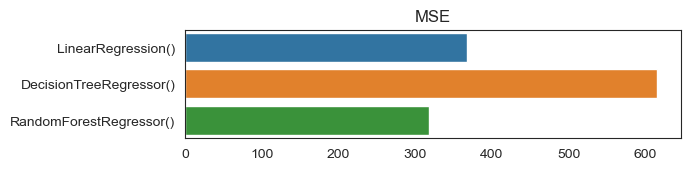

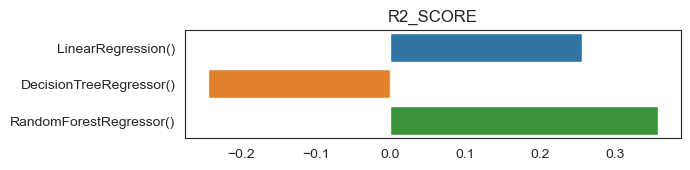

In [34]:
for idx, metric in enumerate(metrics):
    my = metrics[metric].values
    title = metrics[metric].name
    mx = metrics[metric].keys()
    ax = plt.subplot(3, 1, 1)
    sns.barplot(y=mx, x=my, ax=ax, orient="h")
    plt.title(title)
    plt.show()

<p>The negative R2 score for decision tree shows that model failed to generalize on given dataset.</p>

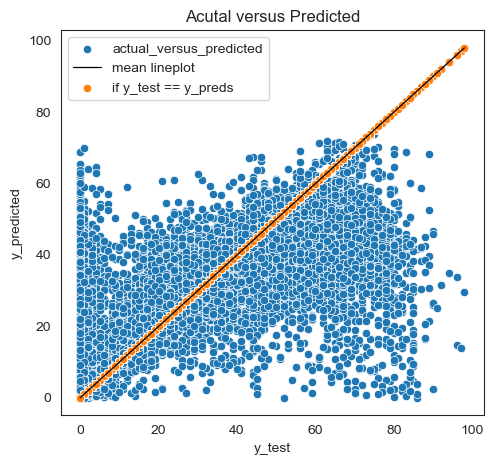

In [35]:
plt.figure(figsize=(12, 5))
ax = plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_preds, ax=ax, label="actual_versus_predicted")
ax.plot([0, y_test.max()],[0, y_test.max()], color="black", linewidth=0.9, label="mean lineplot")
ax.set_xlabel("y_test")
ax.set_ylabel("y_predicted")
plt.title("Acutal versus Predicted")
sns.scatterplot(x=y_test, y=y_test, label="if y_test == y_preds")
plt.legend()
plt.show()

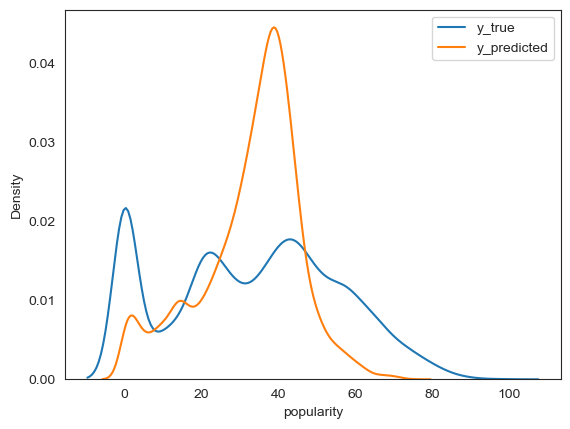

In [36]:
# Kernel Density Estimate (KDE) Plot

sns.kdeplot(y_test, label="y_true")
sns.kdeplot(y_preds, label="y_predicted")

plt.legend()
plt.show()

# the popularity for p=40 is worsly predicted i.e with high error.

In [ ]:
# model_complexity(n_estimators, max_depth) versus errors(training, validation, testing)

n_estimators = [100, 200, 300]

train_errors = []
val_errors = []
for i, n_estimator in enumerate(n_estimators):
    regr = RandomForestRegressor(n_estimators = n_estimator)
    regr.fit(X_train, y_train)
    
    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)
    
    train_error = mean_squared_error(y_train, y_train_pred)
    train_errors.append(train_error)
    
    test_error = mean_squared_error(y_test, y_test_pred)
    val_errors.append(test_error)
    print(f"Iteration {i + 1} completed with param = {n_estimator}" )

Iteration 1 completed with param = 100
Iteration 2 completed with param = 200


In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(n_estimators, train_errors, label='Training Error')
plt.plot(n_estimators, val_errors, label='Testing Error')
plt.title('Bias-Variance Tradeoff')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(n_estimators, train_errors, label='Training Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Training Error')

plt.subplot(1, 3, 3)
plt.plot(n_estimators, val_errors, label='Testing Error')
plt.xlabel('Number of Estimators')
plt.ylabel('Testing Error')

plt.show()

<p>One can see from above figure that our model is overfitted since the error is very less in training dataset compared to testing dataset</p>
<p>On the other hand, we can see the increasing the number of estimators helps to reduce the error during model training and testing. Thus, we are now using cross-validation to overcome overfitting problem as well as to tune hyperparameters like n_estimators in RanfomForest Regressor.</p>

<h3>KFold Cross-Validation</h3>

In [ ]:
"""
KFold is a technique in which the dataset is divided into equally spaced k-chunks. These k-chunks consist of one testing dataset
(used for model validation) and k-1 training dataset to train model. First of all, whole dataset is divided into training and 
testing (also known as holdout dataset) and further, training dataset is partitioned into training (k-1) and validation dataset.
"""
kfolds = KFold(n_splits=10, shuffle=False, random_state=None) 
# 10 fold cross validation --> 9 chunks as training and one chunk as validation

for i, data in enumerate(kfolds.split(X)):
    train_index, test_index = data
    print(f"Fold {i}")
    print(f"Tain index: {train_index}")
    print(f"Test index: {test_index}")
    print("\n")

In [ ]:
model = RandomForestRegressor(n_estimators=100)

train, test = train_test_split(df, test_size=0.3, random_state=42)
X_hold, y_hold = test.drop(['popularity'], axis=1), test['popularity']  # X_test, y_test

opt_counter = 0
score = 0
for i, data in enumerate(kfolds.split(train)):
    train_index, test_index = data   # train, validation index
    train_data = df.iloc[train_index] # training data
    test_data = df.iloc[test_index] # validation data
    X_train, y_train = train_data.drop(['popularity'], axis=1), train_data['popularity']
    X_val, y_val = test_data.drop(['popularity'], axis=1), test_data['popularity'] 
    model.fit(X_train, y_train)
    y_preds = model.predict(X_val)
    mse = mean_squared_error(y_val, y_preds)
    r2score = r2_score(y_val, y_preds)
    if r2score > score:
        opt_counter = i
        score = r2score
    print(f"Fold {i} Results: MSE = {mse} and R2Score = {r2score}")

In [ ]:
"""
We see that in above example, Fold [opt_counter] has minimum MSE and highest R2 score. 
Thus, the appropriate folding would be fold [opt_counter].
"""
# Now we train our model using fold opt_counter and predict outcomes on the unseen test data X_hold. 
for i, data in enumerate(kfolds.split(train)):
    if i == opt_counter:
        train_index, test_index = data   # train, validation index
        train_data = df.iloc[train_index] # training data
        X_train, y_train = train_data.drop(['popularity'], axis=1), train_data['popularity']
        model.fit(X_train, y_train)
        y_preds = model.predict(X_hold)
        mse = mean_squared_error(y_hold, y_preds)
        r2score = r2_score(y_hold, y_preds)
        print(f"Fold {i} Results: MSE = {mse} and R2Score = {r2score}")

<p>Using the appropriate fold of dataset, our R2 score increased significantly as shown above.</p>

<h3>Hyper-parameter Tunning: Cross-Validation using GridSearch from Scratch</h3>

In [ ]:
# Hyperparameter Tunning using cross-validation

n_estimators = [100, 200, 300]

criterion = ['squared_error']  
# measuring the quality of a split when constructing the random forest i.e when bootstrapping or bagging datasets for ensembling

max_depth = [None, 5, 10]

"""
Grid Search algorithm forms the combination of hyperparameters and use one at a time to train model 
through cross-validation or KFold technique.
"""
hyperparam_list = []
for estimator in n_estimators:
    for criteria in criterion:
        for depth in max_depth:
            model = RandomForestRegressor(n_estimators=estimator, max_depth=depth, criterion=criteria)
            scores = cross_val_score(model, X, y, cv=3,)
            mean_score = np.mean(scores)
            paramgrid = {'n_estimators': estimator, 'criterion': criteria, 'max_depth': depth, 'score': mean_score}
            hyperparam_list.append(paramgrid)
            print(paramgrid)

<p>From above hyperparam_list, we can choose the optimal parameter as one with highest scoring. 
    In this way, we can tune the hyper parameter through cross validation and grid search.</p>

<h3>Using RandomizedSearchCV from Sklearn</h3>

In [ ]:
"""
Random Search algorithm forms the combination of hyperparameters but select the combination of parameters randomly 
and use one at a time to train model through cross-validation or KFold technique until some stopping conditions
like number of iterations or desired output accuracy is acheived.
"""
n_features = df.shape[1]
n_samples = df.shape[0]

randomForest = RandomForestRegressor(random_state=42)
parameters= {
    'n_estimators': [100, 200],
    'max_features': [0.3, 'sqrt', 'log2', n_features//2],
    'min_samples_split': [2, n_samples//2],
    'min_samples_leaf': [1, n_samples//3]
}
grid = RandomizedSearchCV(randomForest, cv=3, param_distributions=parameters, n_iter=2) # using 3-fold cross-validation
grid.fit(X, y)

In [ ]:
grid.best_estimator_.score(X_test, y_test)

In [ ]:
grid.best_score_

Considering the test score (e.g. 0.90) being higher than the cross-validation score (e.g. 0.40), it indicates that the model is performing better on the test dataset than on average during cross-validation. This scenario is usually a positive sign, suggesting that the model is not underfitting the data.

In [ ]:
grid.best_params_

<h3>Useful Applications of the Project</h3>
<p>1. Playlist Curation: Creating personalized playlist based on popularity</p>
<p>2. Marketing Campaign: Predict popular or trending songs and use those songs in social-media content, commercial advertisement, games like pubg, etc.</p>
<p>3. Trend Analysis: </p>
<p>4. Music Recommendation Systems</p>